# ¿Cuál es la mejor tarifa?

Trabajas como analista para el operador de telecomunicaciones Megaline. La empresa ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de las tarifas genera más ingresos para poder ajustar el presupuesto de publicidad.

Vas a realizar un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Tendrás los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan, así como la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. Tu trabajo es analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos.

[Te proporcionamos algunos comentarios para orientarte mientras completas este proyecto. Pero debes asegurarte de eliminar todos los comentarios entre corchetes antes de entregar tu proyecto.]

[Antes de sumergirte en el análisis de datos, explica por tu propia cuenta el propósito del proyecto y las acciones que planeas realizar.]

[Ten en cuenta que estudiar, modificar y analizar datos es un proceso iterativo. Es normal volver a los pasos anteriores y corregirlos/ampliarlos para permitir nuevos pasos.]

## Inicialización

In [130]:
# Cargar todas las librerías
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats as st
import math

pc_path = "E:\\datasets\\"


## Cargar datos

In [131]:
# Carga los archivos de datos en diferentes DataFrames
calls = pd.read_csv(pc_path + "megaline_calls.csv")
internet = pd.read_csv(pc_path + "megaline_internet.csv")
messages = pd.read_csv(pc_path + "megaline_messages.csv")
plans = pd.read_csv(pc_path + "megaline_plans.csv")
users = pd.read_csv(pc_path + "megaline_users.csv")


## Preparar los datos

[Los datos para este proyecto se dividen en varias tablas. Explora cada una para tener una comprensión inicial de los datos. Si es necesario, haz las correcciones requeridas en cada tabla.]

## Tarifas

In [132]:
# Imprime la información general/resumida sobre el DataFrame de las tarifas
plans.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 260.0+ bytes


In [133]:
# Imprime una muestra de los datos para las tarifas
plans.head()


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

- La tabla contiene 2 registros con la información de los planes. No contiene registros duplicados, datos ausentes o datos que le hagan falta arreglo en su formato.

## Corregir datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

## Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

## Usuarios/as

In [134]:
# Imprime la información general/resumida sobre el DataFrame de usuarios
users.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [135]:
# Imprime una muestra de datos para usuarios
print(users.sample(10))
print()
print(f"Existen {users.duplicated().sum()} registros duplicados")

     user_id first_name last_name  age  \
429     1429    Arianna      Rowe   36   
396     1396    Ardelia    Benton   65   
71      1071        Isa       Roy   29   
495     1495      Fidel    Sharpe   67   
248     1248     Leigha    Dawson   35   
271     1271     Darrin      Rose   48   
4       1004    Leonila  Thompson   40   
472     1472     Maximo   Mendoza   51   
54      1054      Denis     Frost   50   
194     1194     Robert    Mclean   40   

                                                 city    reg_date  plan  \
429         New York-Newark-Jersey City, NY-NJ-PA MSA  2018-12-22  surf   
396                            Salt Lake City, UT MSA  2018-06-01  surf   
71          New York-Newark-Jersey City, NY-NJ-PA MSA  2018-05-23  surf   
495         New York-Newark-Jersey City, NY-NJ-PA MSA  2018-09-04  surf   
248  Nashville-Davidson–Murfreesboro–Franklin, TN MSA  2018-11-01  surf   
271         New York-Newark-Jersey City, NY-NJ-PA MSA  2018-06-24  surf   
4           

[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

- La columna de "churn_date" tiene varios valores nulos. Se puede corregir llenándolos con otro valor para evitar problemas con el análisis.

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [136]:
users['churn_date'] = users['churn_date'].fillna(0)

users['reg_date'] = pd.to_datetime(users['reg_date'])

print(users.sample(10))

     user_id first_name   last_name  age  \
75      1075     Salena       Bates   35   
72      1072    Seymour      Spence   66   
373     1373    Lindsey   Dickerson   21   
278     1278     Masako  Montgomery   39   
207     1207     Samuel      Porter   63   
290     1290   Thaddeus     Compton   33   
123     1123    Dierdre        Nash   66   
396     1396    Ardelia      Benton   65   
413     1413      Andre     Hensley   38   
165     1165      Nigel       Huber   20   

                                                city   reg_date      plan  \
75   Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA 2018-08-06      surf   
72               Dallas-Fort Worth-Arlington, TX MSA 2018-07-12      surf   
373      Minneapolis-St. Paul-Bloomington, MN-WI MSA 2018-08-30  ultimate   
278                         Dayton-Kettering, OH MSA 2018-11-03      surf   
207                  Omaha-Council Bluffs, NE-IA MSA 2018-12-22      surf   
290        New York-Newark-Jersey City, NY-NJ-PA MSA 

### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

## Llamadas

In [137]:
# Imprime la información general/resumida sobre el DataFrame de las llamadas
print(calls.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB
None


In [138]:
# Imprime una muestra de datos para las llamadas
print(calls.sample(10))
print()
print(f"Existen {calls.duplicated().sum()} registros duplicados")


              id  user_id   call_date  duration
137183  1498_110     1498  2018-08-21      6.95
102932  1365_128     1365  2018-12-07      6.86
71350   1254_235     1254  2018-10-14      0.00
3228     1011_81     1011  2018-08-20      4.54
940      1005_31     1005  2018-12-30     13.29
53576   1192_684     1192  2018-12-24     14.83
2802    1010_405     1010  2018-06-17      0.00
113613  1399_236     1399  2018-10-02     18.87
76218    1270_82     1270  2018-09-25     14.70
20339   1077_306     1077  2018-03-11      7.31

Existen 0 registros duplicados


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

- No contiene registros duplicados o datos ausentes. La columna de 'call_date' se debe de cambiar a formato datetime para poder usarlo en el análisis.

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [139]:
calls['call_date'] = pd.to_datetime(calls['call_date'])
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.2+ MB


### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

## Mensajes

In [140]:
# Imprime la información general/resumida sobre el DataFrame de los mensajes
messages.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [141]:
# Imprime una muestra de datos para los mensajes
print(messages.sample(10))
print()
print(f"Existen {messages.duplicated().sum()} registros duplicados")

              id  user_id message_date
13836   1094_164     1094   2018-11-02
27745   1172_202     1172   2018-12-16
22447   1133_610     1133   2018-10-30
54737   1346_241     1346   2018-09-20
73522    1472_58     1472   2018-05-12
64172   1408_297     1408   2018-07-01
29846     1184_4     1184   2018-12-30
6789    1057_113     1057   2018-12-13
69829   1454_191     1454   2018-11-28
50064  1328_1022     1328   2018-09-11

Existen 0 registros duplicados


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

- No contiene registros duplicados o datos ausentes. Se sugiere cambiar el formato de la columna 'message_date' a datetime.

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [142]:
messages['message_date'] = pd.to_datetime(messages['message_date'])

### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

## Internet

In [143]:
# Imprime la información general/resumida sobre el DataFrame de internet
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [144]:
# Imprime una muestra de datos para el tráfico de internet
print(internet.sample(10))
print()
print(f"Existen {calls.duplicated().sum()} registros duplicados")

              id  user_id session_date  mb_used
101292   1483_78     1483   2018-05-08   802.19
55976    1253_40     1253   2018-11-20   513.38
55205    1251_16     1251   2018-06-09   487.32
89526    1413_33     1413   2018-12-20     0.00
60797   1277_100     1277   2018-11-16   582.82
57285   1258_310     1258   2018-08-06     0.00
79317    1369_58     1369   2018-12-20   990.25
68167    1318_50     1318   2018-10-30   132.60
104438  1498_512     1498   2018-08-10   380.85
77505   1362_177     1362   2018-10-11   298.21

Existen 0 registros duplicados


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

-  No contiene registros duplicados o datos ausentes. Se sugiere cambiar el formato de la columna 'session_date' a datetime.

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [145]:
internet['session_date'] = pd.to_datetime(internet['session_date'])

### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

## Estudiar las condiciones de las tarifas

[Es sumamente importante entender cómo funcionan las tarifas, cómo se les cobra a los usuarios en función de su plan de suscripción. Así que te sugerimos imprimir la información de la tarifa para ver una vez más sus condiciones.]

In [146]:
# Imprime las condiciones de la tarifa y asegúrate de que te quedan claras
print(plans)


   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  
0               20          10             0.03            0.03      surf  
1               70           7             0.01            0.01  ultimate  


## Agregar datos por usuario

[Ahora que los datos están limpios, agrega los datos por usuario y por periodo para que solo haya un registro por usuario y por periodo. Esto facilitará mucho el análisis posterior.]

In [147]:
# Calcula el número de llamadas hechas por cada usuario al mes. Guarda el resultado.
calls['month'] = calls['call_date'].dt.month
calls_per_user_each_month = calls.groupby(['user_id', 'month'])['id'].count()

print('Calls made each month per user: \n')
calls_per_user_each_month.head()

Calls made each month per user: 



user_id  month
1000     12       16
1001     8        27
         9        49
         10       65
         11       64
Name: id, dtype: int64

In [148]:
# Calcula la cantidad de minutos usados por cada usuario al mes. Guarda el resultado.
minutes_per_user_each_month = calls.groupby(['user_id', 'month'])['duration'].sum()

print('Total minutes spent each month per user: \n')
print(minutes_per_user_each_month.head(20))

Total minutes spent each month per user: 

user_id  month
1000     12        116.83
1001     8         171.14
         9         297.69
         10        374.11
         11        404.59
         12        392.93
1002     10         54.13
         11        359.76
         12        363.24
1003     12       1041.00
1004     5         181.58
         6         261.32
         7         358.45
         8         334.86
         9         284.60
         10        341.63
         11        452.98
         12        403.53
1005     12        470.22
1006     11          9.32
Name: duration, dtype: float64


In [149]:
# Calcula el número de mensajes enviados por cada usuario al mes. Guarda el resultado.
messages['month'] = messages['message_date'].dt.month
messages_per_user_each_month = messages.groupby(['user_id', 'month'])['id'].count()

print('Total messages sent each month per user: \n')
print(messages_per_user_each_month.head(20))


Total messages sent each month per user: 

user_id  month
1000     12       11
1001     8        30
         9        44
         10       53
         11       36
         12       44
1002     10       15
         11       32
         12       41
1003     12       50
1004     5         7
         6        18
         7        26
         8        25
         9        21
         10       24
         11       25
         12       31
1005     12       11
1006     11       15
Name: id, dtype: int64


In [150]:
# Calcula el volumen del tráfico de Internet usado por cada usuario al mes. Guarda el resultado.
internet['month'] = internet['session_date'].dt.month
mb_used_per_user_each_month = internet.groupby(['user_id', 'month'])['mb_used'].sum()

print('Total mb used each month per user \n')
print(mb_used_per_user_each_month.head(20))

Total mb used each month per user 

user_id  month
1000     12        1901.47
1001     8         6919.15
         9        13314.82
         10       22330.49
         11       18504.30
         12       19369.18
1002     10        6552.01
         11       19345.08
         12       14396.24
1003     12       27044.14
1004     5         6547.21
         6        20672.82
         7        24516.62
         8        27981.74
         9        18852.72
         10       14541.63
         11       21850.78
         12       21389.29
1005     12       17140.17
1006     11        2068.37
Name: mb_used, dtype: float64


[Junta los datos agregados en un DataFrame para que haya un registro que represente lo que consumió un usuario único en un mes determinado.]

In [151]:
# Fusiona los datos de llamadas, minutos, mensajes e Internet con base en user_id y month
calls_per_user_each_month_df = calls_per_user_each_month.to_frame(name='total_calls')
minutes_per_user_each_month_df = minutes_per_user_each_month.to_frame(name='total_minutes')
messages_per_user_each_month_df = messages_per_user_each_month.to_frame(name='total_messages')
mb_used_per_user_each_month_df = mb_used_per_user_each_month.to_frame(name='total_mb_used')

user_consumption = pd.concat([calls_per_user_each_month_df, minutes_per_user_each_month_df, messages_per_user_each_month_df, mb_used_per_user_each_month_df], axis=1)
user_consumption = user_consumption.fillna(0)

user_consumption['total_calls'] = user_consumption['total_calls'].astype('int')
user_consumption['total_messages'] = user_consumption['total_messages'].astype('int')

user_consumption.info()
print(user_consumption)

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 2293 entries, (np.int64(1000), np.int32(12)) to (np.int64(1311), np.int32(6))
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   total_calls     2293 non-null   int64  
 1   total_minutes   2293 non-null   float64
 2   total_messages  2293 non-null   int64  
 3   total_mb_used   2293 non-null   float64
dtypes: float64(2), int64(2)
memory usage: 98.5 KB
               total_calls  total_minutes  total_messages  total_mb_used
user_id month                                                           
1000    12              16         116.83              11        1901.47
1001    8               27         171.14              30        6919.15
        9               49         297.69              44       13314.82
        10              65         374.11              53       22330.49
        11              64         404.59              36       18504.30
...     

In [152]:
# Añade la información de la tarifa
user_consumption_with_plan = user_consumption.reset_index().merge(users, on='user_id')
user_consumption_with_plan = user_consumption_with_plan.drop(['first_name', 'last_name', 'age', 'city', 'reg_date', 'churn_date'],axis=1).sort_values(by=['user_id', 'month'])

print(user_consumption_with_plan.head(20))

    user_id  month  total_calls  total_minutes  total_messages  total_mb_used  \
0      1000     12           16         116.83              11        1901.47   
1      1001      8           27         171.14              30        6919.15   
2      1001      9           49         297.69              44       13314.82   
3      1001     10           65         374.11              53       22330.49   
4      1001     11           64         404.59              36       18504.30   
5      1001     12           56         392.93              44       19369.18   
6      1002     10           11          54.13              15        6552.01   
7      1002     11           55         359.76              32       19345.08   
8      1002     12           47         363.24              41       14396.24   
9      1003     12          149        1041.00              50       27044.14   
10     1004      5           21         181.58               7        6547.21   
11     1004      6          

In [153]:
user_consumption_with_plan.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2293 entries, 0 to 2257
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   user_id         2293 non-null   int64  
 1   month           2293 non-null   int32  
 2   total_calls     2293 non-null   int64  
 3   total_minutes   2293 non-null   float64
 4   total_messages  2293 non-null   int64  
 5   total_mb_used   2293 non-null   float64
 6   plan            2293 non-null   object 
dtypes: float64(2), int32(1), int64(3), object(1)
memory usage: 134.4+ KB


[Calcula los ingresos mensuales por usuario (resta el límite del paquete gratuito del número total de llamadas, mensajes de texto y datos; multiplica el resultado por el valor del plan de llamadas; añade la tarifa mensual en función del plan de llamadas). Nota: Dadas las condiciones del plan, ¡esto podría no ser tan trivial como un par de líneas! Así que no pasa nada si dedicas algo de tiempo a ello.]

In [154]:
# Calcula el ingreso mensual para cada usuario

def calculate_total_cost(row):
    
    extra_minutes_cost = 0
    extra_messages_cost = 0
    extra_gb_cost = 0
    
    if (row['plan'] == 'surf'):
        
        monthly_pay = 20

        if (row['total_minutes'] > 500):
            extra_minutes = row['total_minutes'] - 500
            extra_minutes = np.ceil(extra_minutes)
            extra_minutes_cost = extra_minutes * 0.03

        if (row['total_messages'] > 50):
            extra_messages = row['total_messages'] - 50
            extra_messages_cost = extra_messages * 0.03

        if (row['total_mb_used'] > 15360):
            extra_mb = row['total_mb_used'] - 15360
            extra_gb = np.ceil(extra_mb / 1000)
            extra_gb_cost = extra_gb * 10
        
        total_cost = monthly_pay + extra_minutes_cost + extra_messages_cost + extra_gb_cost
        
    else:
        
        monthly_pay = 70

        if (row['total_minutes'] > 3000):
            extra_minutes = row['total_minutes'] - 3000
            extra_minutes = np.ceil(extra_minutes)
            extra_minutes_cost = extra_minutes * 0.01

        if (row['total_messages'] > 1000):
            extra_messages = row['total_messages'] - 1000
            extra_messages_cost = extra_messages * 0.01

        if (row['total_mb_used'] > 30720):
            extra_mb = row['total_mb_used'] - 30720
            extra_gb = np.ceil(extra_mb / 1000)
            extra_gb_cost = extra_gb * 7
        
        total_cost = monthly_pay + extra_minutes_cost + extra_messages_cost + extra_gb_cost
    
    return total_cost

user_consumption_with_plan['total_cost'] = user_consumption_with_plan.apply(calculate_total_cost, axis=1)

print(user_consumption_with_plan.head(20))

    user_id  month  total_calls  total_minutes  total_messages  total_mb_used  \
0      1000     12           16         116.83              11        1901.47   
1      1001      8           27         171.14              30        6919.15   
2      1001      9           49         297.69              44       13314.82   
3      1001     10           65         374.11              53       22330.49   
4      1001     11           64         404.59              36       18504.30   
5      1001     12           56         392.93              44       19369.18   
6      1002     10           11          54.13              15        6552.01   
7      1002     11           55         359.76              32       19345.08   
8      1002     12           47         363.24              41       14396.24   
9      1003     12          149        1041.00              50       27044.14   
10     1004      5           21         181.58               7        6547.21   
11     1004      6          

## Estudia el comportamiento de usuario

[Calcula algunas estadísticas descriptivas para los datos agregados y fusionados que nos sean útiles y que muestren un panorama general captado por los datos. Dibuja gráficos útiles para facilitar la comprensión. Dado que la tarea principal es comparar las tarifas y decidir cuál es más rentable, las estadísticas y gráficas deben calcularse por tarifa.]

[En los comentarios hallarás pistas relevantes para las llamadas, pero no las hay para los mensajes e Internet. Sin embargo, el principio del estudio estadístico que se aplica para ellos es el mismo que para las llamadas.]

### Llamadas

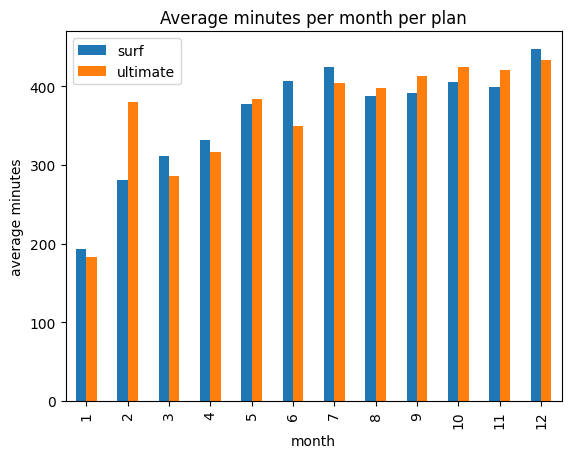

month
1     183.162500
2     379.861429
3     285.701667
4     316.508095
5     383.664828
6     349.811064
7     403.767288
8     397.274789
9     413.287326
10    425.168019
11    420.477559
12    433.012583
Name: total_minutes, dtype: float64


In [155]:
# Compara la duración promedio de llamadas por cada plan y por cada mes. Traza un gráfico de barras para visualizarla.
surf_consumption = user_consumption_with_plan[user_consumption_with_plan['plan'] == 'surf']
surf_avg_minutes_per_month = surf_consumption.groupby('month')['total_minutes'].mean().to_frame(name = 'average_minutes')

ultimate_consumption = user_consumption_with_plan[user_consumption_with_plan['plan'] == 'ultimate']
ultimate_avg_minutes_per_month = ultimate_consumption.groupby('month')['total_minutes'].mean()

surf_avg_minutes_per_month.merge(ultimate_avg_minutes_per_month, left_index = True, right_index = True).plot(kind = 'bar', 
                                                                                                         xlabel = 'month', 
                                                                                                         ylabel = 'average minutes',
                                                                                                         title = 'Average minutes per month per plan')
plt.legend(['surf','ultimate'])
plt.show()

print(ultimate_avg_minutes_per_month)

<Axes: title={'center': 'average_minutes'}>

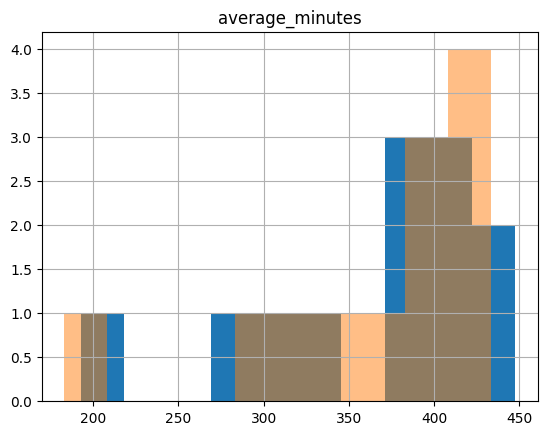

In [156]:
# Compara el número de minutos mensuales que necesitan los usuarios de cada plan. Traza un histograma.
surf_avg_minutes_per_month.hist()
ultimate_avg_minutes_per_month.hist(alpha=0.5)


[Calcula la media y la variable de la duración de las llamadas para averiguar si los usuarios de los distintos planes se comportan de forma diferente al realizar sus llamadas.]

In [172]:
# Calcula la media y la varianza de la duración mensual de llamadas.
surf_calls_mean = np.mean(surf_avg_minutes_per_month)
surf_calls_variance = np.var(surf_avg_minutes_per_month, axis = 0)

ultimate_calls_mean = np.mean(ultimate_avg_minutes_per_month)
ultimate_calls_variance = np.var(ultimate_avg_minutes_per_month, axis = 0)

print('Surf mean value:', surf_calls_mean)
print('Ultimate mean value:', ultimate_calls_mean)

print()
print('Surf variance:', surf_calls_variance)
print('Ultimate variance: ', ultimate_calls_variance)
print()
print(f'std: {np.std(surf_avg_minutes_per_month)}, function std: {surf_avg_minutes_per_month.std()}', )

Surf mean value: 363.06296730659636
Ultimate mean value: 365.9747620871722

Surf variance: average_minutes    4745.877726
dtype: float64
Ultimate variance:  4891.083208193699

std: average_minutes    68.890331
dtype: float64, function std: average_minutes    71.953604
dtype: float64


c:\Users\Roberto Carlos\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\_core\fromnumeric.py:4062: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


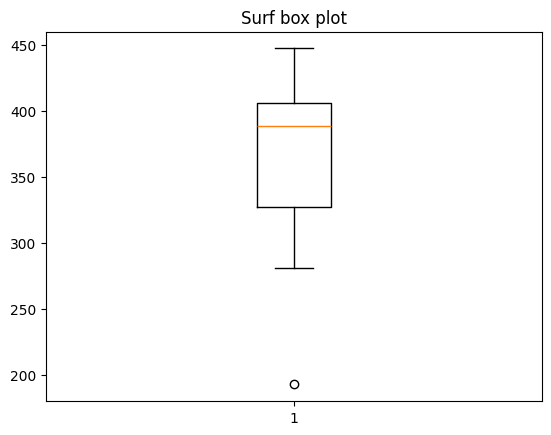

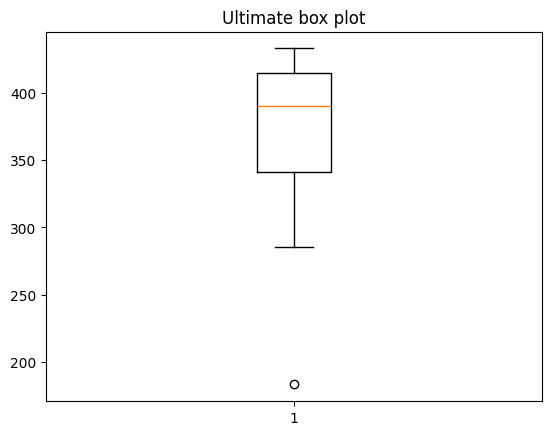

In [158]:
# Traza un diagrama de caja para visualizar la distribución de la duración mensual de llamadas
plt.boxplot(surf_avg_minutes_per_month)
plt.title('Surf box plot')
plt.show()

plt.boxplot(ultimate_avg_minutes_per_month)
plt.title('Ultimate box plot')
plt.show()

[Elabora las conclusiones sobre el comportamiento de los usuarios con respecto a las llamadas. ¿Su comportamiento varía en función del plan?]

- Basándonos en las gráficas, el comportamiento de los usuarios con respecto a las llamadas es muy parecido. La media de llamadas en ambos planes es muy parecida con el plan ultimate teniendo mayor varianza.

### Mensajes

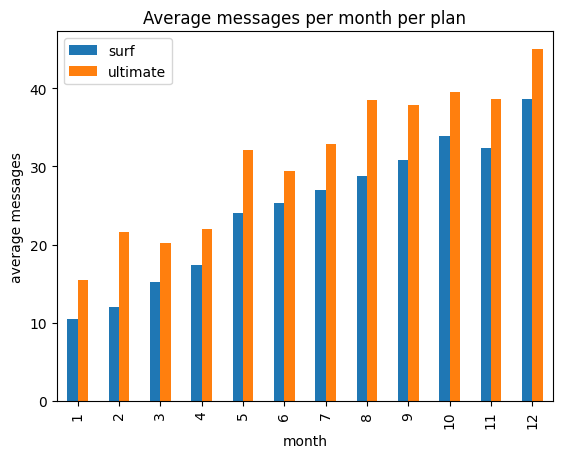

In [159]:
# Comprara el número de mensajes que tienden a enviar cada mes los usuarios de cada plan
surf_avg_msg_per_month = surf_consumption.groupby('month')['total_messages'].mean().to_frame(name = 'average_messages')
ultimate_avg_msg_per_month = ultimate_consumption.groupby('month')['total_messages'].mean()

surf_avg_msg_per_month.merge(ultimate_avg_msg_per_month, left_index=True, right_index=True).plot(kind = 'bar',
                                                                                                 xlabel = 'month',
                                                                                                 ylabel = 'average messages',
                                                                                                 title = 'Average messages per month per plan')

plt.legend(['surf', 'ultimate'])
plt.show()

In [160]:
surf_msg_mean = np.mean(surf_avg_msg_per_month)
surf_msg_variance = np.var(surf_avg_msg_per_month, axis = 0)

ultimate_msg_mean = np.mean(ultimate_avg_msg_per_month)
ultimate_msg_variance = np.var(ultimate_avg_msg_per_month, axis = 0)

print('Surf mean value:', surf_msg_mean)
print('Ultimate mean value:', ultimate_msg_mean)
print()
print('Surf std:', surf_avg_msg_per_month.std())
print('Ultimate std: ', ultimate_avg_msg_per_month.std())

Surf mean value: 24.655999855500053
Ultimate mean value: 31.08949749446805

Surf std: average_messages    9.049246
dtype: float64
Ultimate std:  9.34633421312449


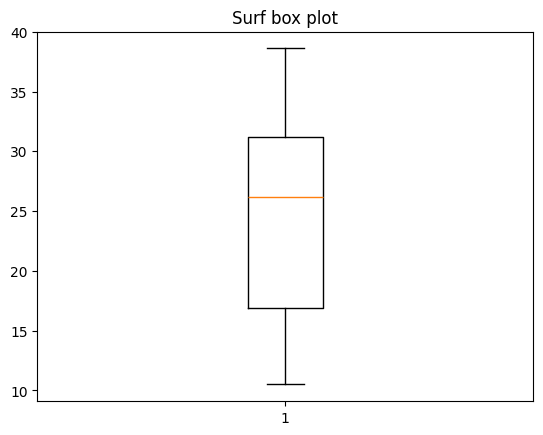

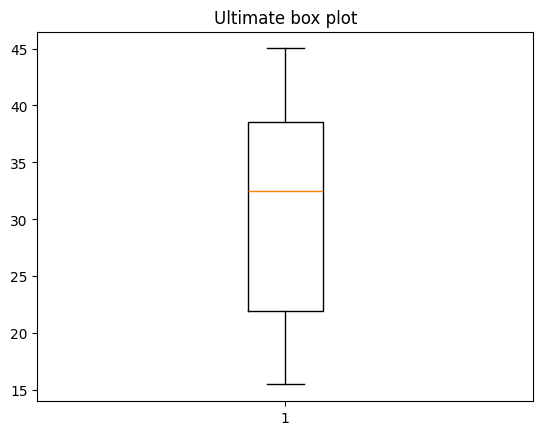

In [161]:
plt.boxplot(surf_avg_msg_per_month)
plt.title('Surf box plot')
plt.show()

plt.boxplot(ultimate_avg_msg_per_month)
plt.title('Ultimate box plot')
plt.show()

[Elabora las conclusiones sobre el comportamiento de los usuarios con respecto a los mensajes. ¿Su comportamiento varía en función del plan?]

- El comportamiento es muy parecido, su variabilidad es similar pero en el plan de ultimate la media de mensajes es mayor que en el de surf.

### Internet

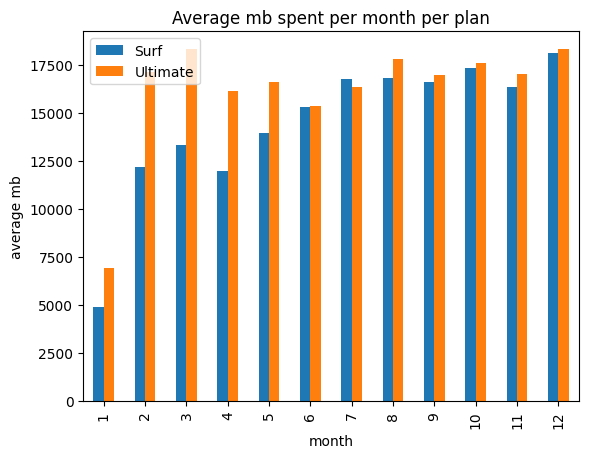

In [162]:
surf_avg_mb_per_month = surf_consumption.groupby('month')['total_mb_used'].mean().to_frame('average_mb')
ultimate_avg_mb_per_month = ultimate_consumption.groupby('month')['total_mb_used'].mean()

surf_avg_mb_per_month.merge(ultimate_avg_mb_per_month, left_index=True, right_index=True).plot(kind = 'bar',
                                                                                               xlabel = 'month',
                                                                                               ylabel = 'average mb',
                                                                                               title = 'Average mb spent per month per plan')

plt.legend(['Surf', 'Ultimate'])
plt.show()

In [163]:
surf_mb_mean = np.mean(surf_avg_mb_per_month)
surf_mb_variance = np.var(surf_avg_mb_per_month, axis = 0)

ultimate_mb_mean = np.mean(ultimate_avg_mb_per_month)
ultimate_mb_variance = np.var(ultimate_avg_mb_per_month, axis = 0)

print('Surf mean value:', surf_mb_mean)
print('Ultimate mean value:', ultimate_mb_mean)
print()
print('Surf std:', surf_avg_mb_per_month.std())
print('Ultimate std: ', ultimate_avg_mb_per_month.std())

Surf mean value: 14464.554376681197
Ultimate mean value: 16212.603527638314

Surf std: average_mb    3642.89043
dtype: float64
Ultimate std:  3057.9877910973737


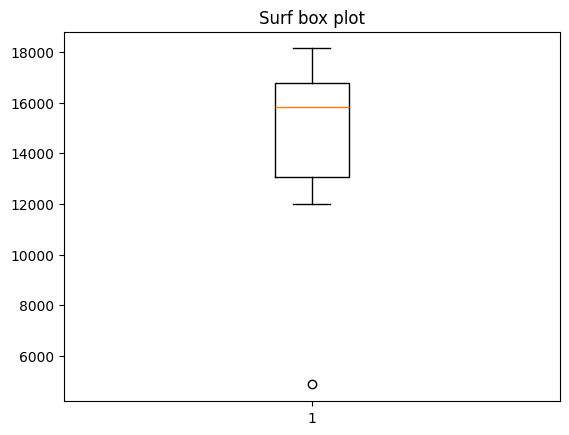

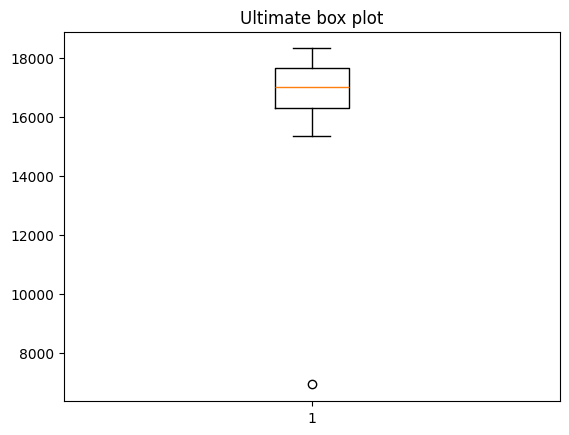

In [164]:
plt.boxplot(surf_avg_mb_per_month)
plt.title('Surf box plot')
plt.show()

plt.boxplot(ultimate_avg_mb_per_month)
plt.title('Ultimate box plot')
plt.show()

[Elabora las conclusiones sobre cómo los usuarios tienden a consumir el tráfico de Internet. ¿Su comportamiento varía en función del plan?]

- La media de llamadas es mayor en el plan ultimate que en el de surf. Sin embargo, su variabilidad es menor.

## Ingreso

[Del mismo modo que has estudiado el comportamiento de los usuarios, describe estadísticamente los ingresos de los planes.]

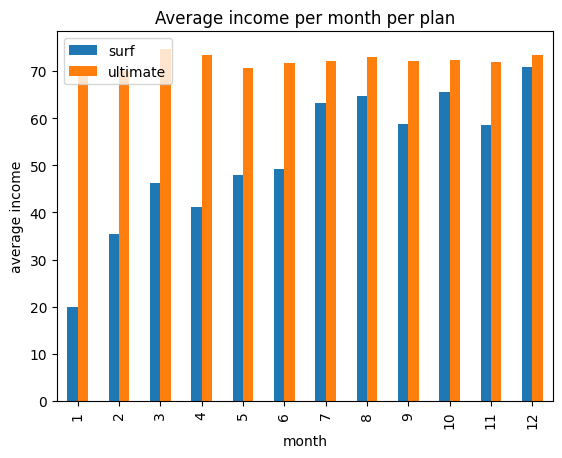

In [165]:
surf_avg_income_per_month = surf_consumption.groupby('month')['total_cost'].mean().to_frame(name = 'average_income')
ultimate_avg_income_per_month = ultimate_consumption.groupby('month')['total_cost'].mean()

surf_avg_income_per_month.merge(ultimate_avg_income_per_month, left_index=True, right_index=True).plot(kind = 'bar',
                                                                                                 xlabel = 'month',
                                                                                                 ylabel = 'average income',
                                                                                                 title = 'Average income per month per plan')

plt.legend(['surf', 'ultimate'])
plt.show()

In [166]:
surf_income_mean = np.mean(surf_avg_income_per_month)
surf_income_variance = np.var(surf_avg_income_per_month, axis = 0)

ultimate_income_mean = np.mean(ultimate_avg_income_per_month)
ultimate_income_variance = np.var(ultimate_avg_income_per_month, axis = 0)

print('Surf mean value:', surf_income_mean)
print('Ultimate mean value:', ultimate_income_mean)
print()
print('Surf std:', surf_avg_income_per_month.std())
print('Ultimate std: ', ultimate_avg_income_per_month.std())

Surf mean value: 51.75953884169227
Ultimate mean value: 72.06950879792468

Surf std: average_income    14.729075
dtype: float64
Ultimate std:  1.3982183378274446


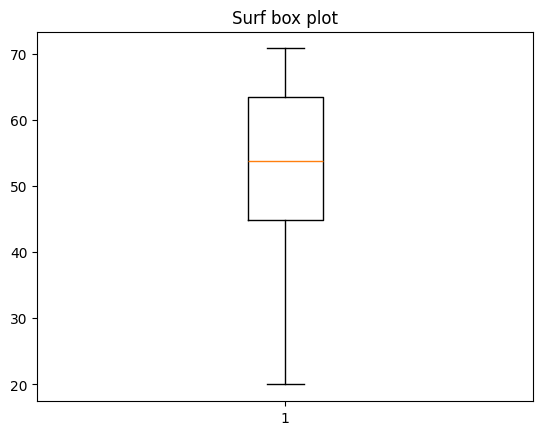

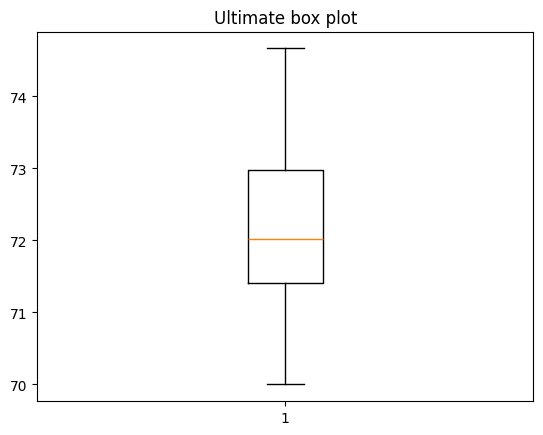

In [167]:
plt.boxplot(surf_avg_income_per_month)
plt.title('Surf box plot')
plt.show()

plt.boxplot(ultimate_avg_income_per_month)
plt.title('Ultimate box plot')
plt.show()

[Elabora las conclusiones sobre cómo difiere el ingreso entre los planes.]

- La media de los ingresos por mes en el plan ultimate es mayor. El plan ultimate tiene menos variabilidad en sus datos. 

## Prueba las hipótesis estadísticas

[Prueba la hipótesis de que son diferentes los ingresos promedio procedentes de los usuarios de los planes de llamada Ultimate y Surf.]

[Elabora las hipótesis nula y alternativa, escoge la prueba estadística, determina el valor alfa.]

In [168]:
# Prueba las hipótesis

#Hipotesis nula: las 2 medias son iguales
#Hipotesis alternativa: las 2 medias son diferentes

ultimate_avg_income_per_month_df = ultimate_avg_income_per_month.to_frame(name='average_income')

print('Surf average income per month: \n', surf_avg_income_per_month)
print()
print('Ultimate average income per month: \n', ultimate_avg_income_per_month_df)

alpha = 0.05

results = st.ttest_ind(surf_avg_income_per_month['average_income'], ultimate_avg_income_per_month_df['average_income'])

print()
print('P-value: ', results.pvalue)

if results.pvalue < alpha:
    print("Reject null hypothesis")
else:
    print("Fail to reject null hypothesis")



Surf average income per month: 
        average_income
month                
1           20.000000
2           35.371111
3           46.227391
4           41.058600
5           47.889481
6           49.244433
7           63.135372
8           64.626111
9           58.673969
10          65.641814
11          58.446184
12          70.800000

Ultimate average income per month: 
        average_income
month                
1           70.000000
2           70.000000
3           74.666667
4           73.333333
5           70.724138
6           71.638298
7           72.016949
8           72.859155
9           72.034884
10          72.311321
11          71.818898
12          73.430464

P-value:  9.544278399591421e-05
Reject null hypothesis


Conclusión: Se rechaza la hipotesis nula, los ingresos medios son diferentes.

[Prueba la hipótesis de que el ingreso promedio de los usuarios del área NY-NJ es diferente al de los usuarios de otras regiones.]

[Elabora las hipótesis nula y alternativa, escoge la prueba estadística, determina el valor alfa.]

In [169]:
# Prueba las hipótesis



## Conclusión general

[En esta sección final, enumera tus conclusiones importantes. Asegúrate de que estas abarquen todas las decisiones (suposiciones) importantes que adoptaste y que determinaron la forma elegida para procesar y analizar los datos.]